## Introduction
You have the tools to obtain data from a single table in whatever format you want it. But what if the data you want is spread across multiple tables?

That's where JOIN comes in! JOIN is incredibly important in practical SQL workflows. So let's get started.

## Example
We'll use our imaginary pets table, which has three columns:

- ID - ID number for the pet
- Name - name of the pet
- Animal - type of animal

We'll also add another table, called owners. This table also has three columns:

- ID - ID number for the owner (different from the ID number for the pet)
- Name - name of the owner
- Pet_ID - ID number for the pet that belongs to the owner (which matches the ID number for the pet in the pets table)

To get information that applies to a certain pet, we match the ID column in the pets table to the Pet_ID column in the owners table.

For example,

- the pets table shows that Dr. Harris Bonkers is the pet with ID 1.
- The owners table shows that Aubrey Little is the owner of the pet with ID 1.

Putting these two facts together, Dr. Harris Bonkers is owned by Aubrey Little.

Fortunately, we don't have to do this by hand to figure out which owner goes with which pet. In the next section, you'll learn how to use JOIN to create a new table combining information from the pets and owners tables.

## JOIN
Using JOIN, we can write a query to create a table with just two columns: the name of the pet and the name of the owner.

We combine information from both tables by matching rows where the ID column in the pets table matches the Pet_ID column in the owners table.

In the query, ON determines which column in each table to use to combine the tables. Notice that since the ID column exists in both tables, we have to clarify which one to use. We use p.ID to refer to the ID column from the pets table, and o.Pet_ID refers to the Pet_ID column from the owners table.

    In general, when you're joining tables, it's a good habit to specify which table each of your columns comes from. That way, you don't have to pull up the schema every time you go back to read the query.

The type of JOIN we're using today is called an INNER JOIN. That means that a row will only be put in the final output table if the value in the columns you're using to combine them shows up in both the tables you're joining. For example, if Tom's ID number of 4 didn't exist in the pets table, we would only get 3 rows back from this query. There are other types of JOIN, but an INNER JOIN is very widely used, so it's a good one to start with.

## Example: How many files are covered by each type of software license?
GitHub is the most popular place to collaborate on software projects. A GitHub repository (or repo) is a collection of files associated with a specific project.

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

We'll work with two tables in the database. The first table is the licenses table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license. Here's a view of the first five rows.

It's a big query, and so we'll investigate each piece separately.

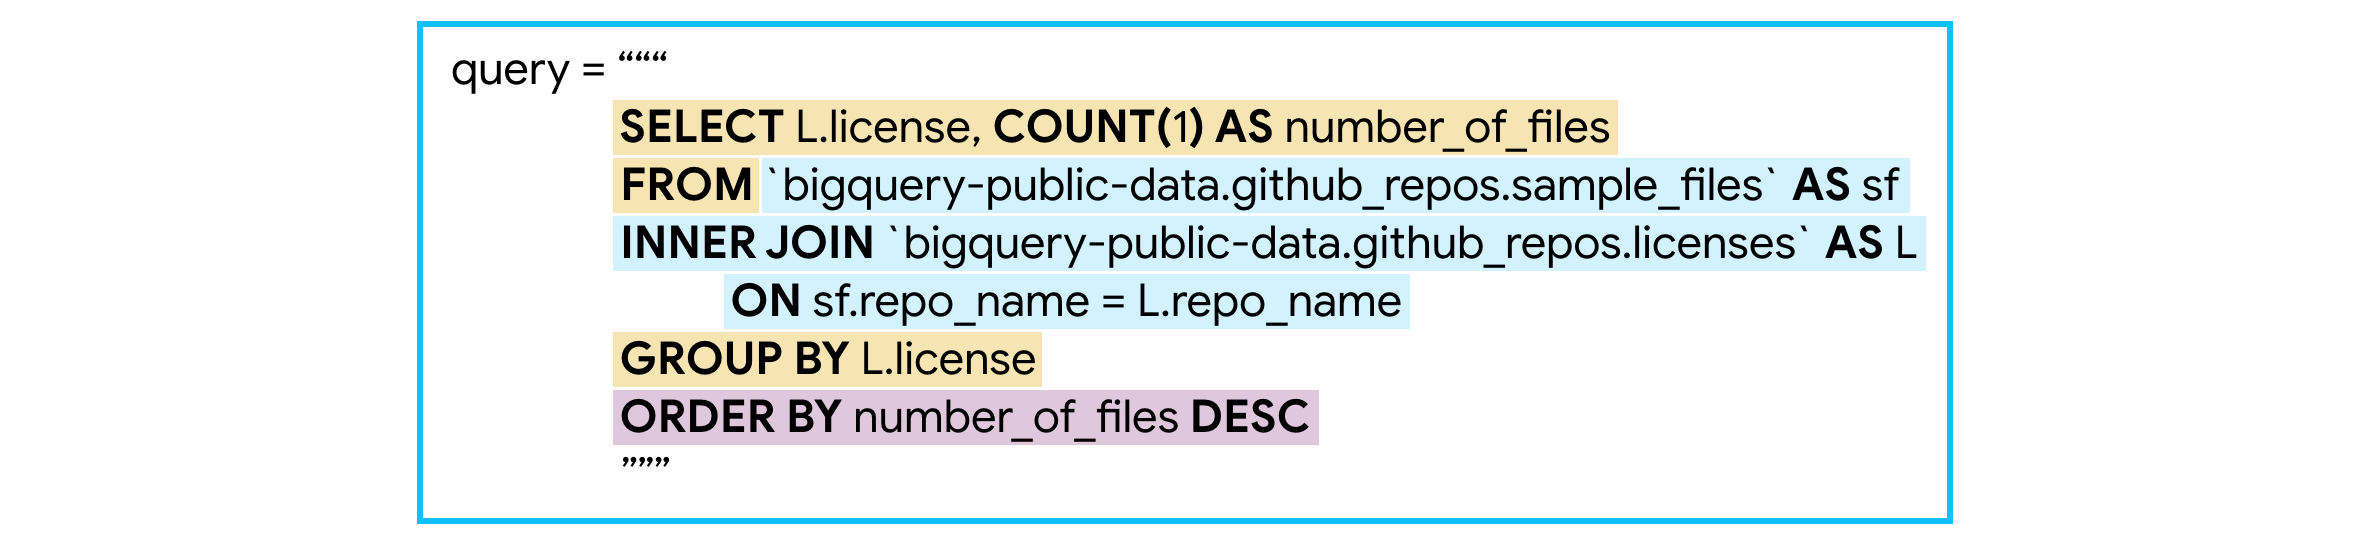

In [2]:
from IPython.display import Image
Image("QeufD01.png")

We'll begin with the JOIN (highlighted in blue above). This specifies the sources of data and how to join them. We use ON to specify that we combine the tables by matching the values in the repo_name columns in the tables.

Next, we'll talk about SELECT and GROUP BY (highlighted in yellow). The GROUP BY breaks the data into a different group for each license, before we COUNT the number of rows in the sample_files table that corresponds to each license. (Remember that you can count the number of rows with COUNT(1).)

Finally, the ORDER BY (highlighted in purple) sorts the results so that licenses with more files appear first.

It was a big query, but it gave us a nice table summarizing how many files have been committed under each license:

You'll use JOIN clauses a lot and get very efficient with them as you get some practice.

# Exercise: Joining Data

## Introduction

[Stack Overflow](https://stackoverflow.com/) is a widely beloved question and answer site for technical questions. You'll probably use it yourself as you keep using SQL (or any programming language). 

Their data is publicly available. What cool things do you think it would be useful for?

Here's one idea:
You could set up a service that identifies the Stack Overflow users who have demonstrated expertise with a specific technology by answering related questions about it, so someone could hire those experts for in-depth help.

In this exercise, you'll write the SQL queries that might serve as the foundation for this type of service.

As usual, run the following cell to set up our feedback system before moving on.

## Exercises

### 1) Explore the data

Before writing queries or **JOIN** clauses, you'll want to see what tables are available. 

*Hint*: Tab completion is helpful whenever you can't remember a command. Type `client.` and then hit the tab key. Don't forget the period before hitting tab.

2) Review relevant tables
If you are interested in people who answer questions on a given topic, the posts_answers table is a natural place to look. Run the following cell, and look at the output.

It isn't clear yet how to find users who answered questions on any given topic. But posts_answers has a parent_id column. If you are familiar with the Stack Overflow site, you might figure out that the parent_id is the question each post is answering.

Look at posts_questions using the cell below.

Are there any fields that identify what topic or technology each question is about? If so, how could you find the IDs of users who answered questions about a specific topic?

Think about it, and then check the solution by running the code in the next cell.

Solution: posts_questions has a column called tags which lists the topics/technologies each question is about.

posts_answers has a column called parent_id which identifies the ID of the question each answer is responding to. posts_answers also has an owner_user_id column which specifies the ID of the user who answered the question.

You can join these two tables to:

- determine the tags for each answer, and then
- select the owner_user_id of the answers on the desired tag.

This is exactly what you will do over the next few questions

### 3) Selecting the right questions

A lot of this data is text. 

We'll explore one last technique in this course which you can apply to this text.

A **WHERE** clause can limit your results to rows with certain text using the **LIKE** feature. For example, to select just the third row of the `pets` table from the tutorial, we could use the query in the picture below.

![](https://i.imgur.com/RccsXBr.png) 

You can also use `%` as a "wildcard" for any number of characters. So you can also get the third row with:

```
query = """
        SELECT * 
        FROM `bigquery-public-data.pet_records.pets` 
        WHERE Name LIKE '%ipl%'
        """
```

Try this yourself. Write a query that selects the `id`, `title` and `owner_user_id` columns from the `posts_questions` table. 
- Restrict the results to rows that contain the word "bigquery" in the `tags` column. 
- Include rows where there is other text in addition to the word "bigquery" (e.g., if a row has a tag "bigquery-sql", your results should include that too).

### 4) Your first join
Now that you have a query to select questions on any given topic (in this case, you chose "bigquery"), you can find the answers to those questions with a **JOIN**.  

Write a query that returns the `id`, `body` and `owner_user_id` columns from the `posts_answers` table for answers to "bigquery"-related questions. 
- You should have one row in your results for each answer to a question that has "bigquery" in the tags.  
- Remember you can get the tags for a question from the `tags` column in the `posts_questions` table.

Here's a reminder of what a **JOIN** looked like in the tutorial:
```
query = """
        SELECT p.Name AS Pet_Name, o.Name AS Owner_Name
        FROM `bigquery-public-data.pet_records.pets` as p
        INNER JOIN `bigquery-public-data.pet_records.owners` as o 
            ON p.ID = o.Pet_ID
        """
```

It may be useful to scroll up and review the first several rows of the `posts_answers` and `posts_questions` tables.  

### 5) Answer the question
You have the merge you need. But you want a list of users who have answered many questions... which requires more work beyond your previous result.

Write a new query that has a single row for each user who answered at least one question with a tag that includes the string "bigquery". Your results should have two columns:
- `user_id` - contains the `owner_user_id` column from the `posts_answers` table
- `number_of_answers` - contains the number of answers the user has written to "bigquery"-related questions

### 6) Building a more generally useful service

How could you convert what you've done to a general function a website could call on the backend to get experts on any topic?  

Think about it and then check the solution below.